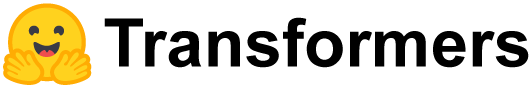

Biblioteka HuggingFace to prawdopodbnie nawjażniejsza biblioteka open-source przeznaczona do pracy z modelami uczenia maszynowego, takimi jak BERT, GPT-2, GPT-3 i wiele innych. Znana jest przede wszystkim z dwóch głównych komponentów:

**Transformers**: Jest to biblioteka w Pythonie, która dostarcza gotowe do użycia implementacje wielu zaawansowanych modeli językowych. Umożliwia ona łatwe trenowanie, ocenę i wdrażanie tych modeli w różnych zastosowaniach, takich jak klasyfikacja tekstu, generowanie tekstu, analiza sentymentu itp.

**Model Hub**: To centrum, w którym społeczność może udostępniać wytrenowane modele i korzystać z modeli udostępnionych przez innych. Dzięki temu użytkownicy mogą łatwo znaleźć odpowiedni model dla swojego zadania i zastosować go bez konieczności trenowania modelu od podstaw.

HuggingFace jest szeroko wykorzystywane w naukach komputerowych, przede wszystkim w dziedzinie przetwarzania języka naturalnego (NLP) ale też w przetwarzaniu obrazu. Można je wykorzystać do takich zastosowań jak tłumaczenie maszynowe, generowanie tekstu, rozpoznawanie mowy, analiza sentymentu, odpowiedzi na pytania i wiele innych.

Dostępne modele można zobaczyć tutaj: https://huggingface.co/models

Możemy wyszukiwać modele ze względu na rodzaj zdania jakie rozwiązuja, język itd.

In [ ]:
!pip install transformers

# Przegląd dos†ępnych zadań (pipelines)

Pipeline to najprostrzy sposób na pracę z modelami z huggingface, pozwala nam w gotowy sposób użyć modeli dla konkretnego zadania

In [ ]:
from transformers import pipeline

## Klasyfikacja tekstu

model: https://huggingface.co/ProsusAI/finbert?text=Stocks+rallied+and+the+British+pound+gained.

Zaimplementujemy teraz gotowy model do klasyfikacji tekstu

In [ ]:
stock_sentiment = pipeline("text-classification", model = "ProsusAI/finbert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
stock_sentiment("Stocks rallied and the British pound gained.")

[{'label': 'positive', 'score': 0.898361325263977}]

## Rozpoznawanie jednostek nazewniczych (Named Entity Recognition (NER))

model : https://huggingface.co/dslim/bert-base-NER-uncased

In [ ]:
ner = pipeline("ner", model = "dslim/bert-base-NER-uncased")

config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER-uncased were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
ner("My name is Wolfgang and I live in Berlin")

[{'entity': 'B-PER',
  'score': 0.993952,
  'index': 4,
  'word': 'wolfgang',
  'start': 11,
  'end': 19},
 {'entity': 'B-LOC',
  'score': 0.997895,
  'index': 9,
  'word': 'berlin',
  'start': 34,
  'end': 40}]

## Question answering

model = https://huggingface.co/deepset/roberta-base-squad2

In [ ]:
qa = pipeline("question-answering", model = "deepset/roberta-base-squad2")

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
context = "My name is Sarah and I live in London"

In [ ]:
qa(question = "What is my name?", context = context)

{'score': 0.5483819246292114, 'start': 11, 'end': 16, 'answer': 'Sarah'}

In [ ]:
qa(question = "Where do I live?", context = context)

{'score': 0.7772289514541626, 'start': 31, 'end': 37, 'answer': 'London'}

## Sumaryzacja

model : https://huggingface.co/facebook/bart-large-cnn

In [ ]:
summarization = pipeline("summarization", model = "facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
long_text = "The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct."

In [ ]:
summarization(long_text)

[{'summary_text': 'The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world.'}]

## Generowanie tekstu

In [ ]:
generator = pipeline("text-generation", model = "gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

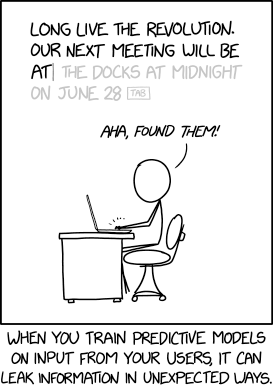

In [ ]:
generator("Long live the rovolution our next meeting will be at")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Long live the rovolution our next meeting will be at #16 here on 6 th June at 12.30pm. Join us there will join @gloriaplume to show us what you think of the future of the'solution"}]

## Klasyfikacja obrazu

In [ ]:
image_classifier = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
!wget https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/3ba670686e7111e181bd12313817987b_7.png

--2024-10-24 08:14:50--  https://raw.githubusercontent.com/maxogden/cats/master/cat_photos/3ba670686e7111e181bd12313817987b_7.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-24 08:14:50 ERROR 404: Not Found.



In [ ]:
image_classifier("3ba670686e7111e181bd12313817987b_7.png")

ValueError: Incorrect image source. Must be a valid URL starting with `http://` or `https://`, a valid path to an image file, or a base64 encoded string. Got 3ba670686e7111e181bd12313817987b_7.png. Failed with cannot identify image file <_io.BytesIO object at 0x7a20c425cef0>

# Zadanie 1 - Question answering

Na podstawie artykułu o Janie Pawle II z wikipedii:

In [ ]:
from transformers import pipeline


text = """ Jan Paweł II (łac. Ioannes Paulus PP. II, wł. Giovanni Paolo II, właśc. Karol Józef Wojtyła i[1]; ur. 18 maja 1920 w Wadowicach, zm. 2 kwietnia 2005 w Watykanie) – polski duchowny rzymskokatolicki, biskup pomocniczy krakowski (1958–1964), a następnie arcybiskup metropolita krakowski (1964–1978), kardynał prezbiter (1967–1978), zastępca Przewodniczącego Konferencji Episkopatu Polski (1969–1978), 264. papież i 6. Suweren Państwa Watykańskiego w latach 1978–2005. Święty Kościoła katolickiego.
Poeta i poliglota, a także aktor niezawodowy, dramaturg i pedagog. Filozof historii, fenomenolog, mistyk i przedstawiciel personalizmu chrześcijańskiego. 16 października 1978 został wybrany na papieża przez drugie zgromadzenie kardynałów, po śmierci Jana Pawła I, który zmarł po trzydziestu trzech dniach pontyfikatu. Przyjął imiona Jan Paweł dla uhonorowania swojego poprzednika. Jego wybór na Stolicę Piotrową miał szczególny wpływ na wydarzenia w Europie Wschodniej i w Azji w latach 80. i 90. XX wieku, w szczególności na przemiany demokratyczne w Polsce i w innych krajach bloku wschodniego. Od początku swojego pontyfikatu prowadził energiczne działania przeciwko komunizmowi i uciskowi politycznemu.
Za główny cel papiestwa postawił sobie transformację i zmianę położenia Kościoła katolickiego, chciał „postawić swój Kościół w sercu nowego sojuszu religijnego, który zgromadziłby żydów, muzułmanów i chrześcijan w wielkiej religijnej armadzie”[potrzebny przypis]. Przyczynił się do poprawienia relacji Kościoła katolickiego z judaizmem, islamem, z Kościołem prawosławnym oraz Wspólnotą anglikańską[2][3][4]. Był jednym z najczęściej podróżujących światowych przywódców w historii, odwiedzając w czasie swojego pontyfikatu 129 państw, co interpretowano jako chęć zbudowania relacji między różnymi narodami i religiami.
Podzielał nauczanie Kościoła w takich kwestiach jak utrzymanie celibatu, potępienie mechanicznej, chemicznej i hormonalnej antykoncepcji, sprzeciwiał się aborcji i eutanazji, podtrzymywał stanowisko Kościoła o prawie do życia oraz niedopuszczenie kobiet do święcenia, za co był przez niektórych krytykowany, i choć popierał reformy soboru watykańskiego II, był postrzegany jako konserwatywny w swojej interpretacji tych reform[5][6]. Walczył z teologią wyzwolenia, stygmatyzował także nieokiełznany kapitalizm i konsumpcjonizm, mimo że niejednokrotnie głosił wyższość gospodarki rynkowej nad znacjonalizowanymi.
Beatyfikował 1340 i kanonizował 483 osoby, więcej niż wszyscy jego poprzednicy w okresie pięciu poprzedzających wieków. Mianował większość Kolegium Kardynałów, konsekrował lub współkonsekrował wielu biskupów i wyświęcił wielu księży. Był trzecim najdłużej urzędującym papieżem w historii, po św. Piotrze (30–67) i Piusie IX (1846–1878), pierwszym papieżem z Polski oraz pierwszym spoza Włoch od czasów holenderskiego papieża Hadriana VI (1522–1523).
Zmarł 2 kwietnia 2005. W ceremonii pogrzebowej uczestniczyły delegacje z ponad 150 państw, a w Polsce ogłoszona została sześciodniowa żałoba narodowa. Proces kanonizacyjny rozpoczął się miesiąc po jego śmierci, z odstąpieniem od tradycyjnego pięcioletniego okresu oczekiwania. 19 grudnia 2009 został ogłoszony Czcigodnym Sługą Bożym przez swojego następcę Benedykta XVI i beatyfikowany 1 maja 2011 w Niedzielę Miłosierdzia Bożego, po tym, jak Kongregacja Spraw Kanonizacyjnych przypisała jego wstawiennictwu cud uzdrowienia. Drugi cud został zatwierdzony 2 lipca 2013 i potwierdzony przez papieża Franciszka trzy dni później. 27 kwietnia 2014 (ponownie Niedziela Miłosierdzia), równocześnie z papieżem Janem XXIII został kanonizowany. Wydarzenie to przeszło do historii Kościoła z powodu ogłoszenia świętymi dwóch papieży w obecności dwóch biskupów Rzymu – urzędującego Franciszka i emerytowanego Benedykta XVI[7][8][9]."""


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/879 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'score': 0.8468378782272339, 'start': 102, 'end': 115, 'answer': ' 18 maja 1920'}
{'score': 0.9220154285430908, 'start': 2888, 'end': 2905, 'answer': ' 2 kwietnia 2005.'}
{'score': 0.8749607801437378, 'start': 2464, 'end': 2468, 'answer': ' 483'}
{'score': 0.7097408771514893, 'start': 3508, 'end': 3525, 'answer': ' 27 kwietnia 2014'}


Znajdź na huggingface model który pozwala odpowiadać na pytania w języku polskim (ustaw filtr `tasks` i `languages` w wyszukiwarce modeli)
Zanaleźć odpowiedni pipeline

Kożystając z modelu odpowiedz na następujące pytania:

* kiedy urodził się papież?
* kiedy zmarł papież?
* ile osób kanonizował?
* kiedy został kaninizowany?

Znajdź na huggingface model który pozwala odpowiadać na pytania w języku polskim (ustaw filtr `tasks` i `languages` w wyszukiwarce modeli)
Zanaleźć odpowiedni pipeline

Kożystając z modelu odpowiedz na następujące pytania:

* kiedy urodził się papież?
* kiedy zmarł papież?
* ile osób kanonizował?
* kiedy został kaninizowany?

Znajdź na huggingface model który pozwala odpowiadać na pytania w języku polskim (ustaw filtr `tasks` i `languages` w wyszukiwarce modeli)
Zanaleźć odpowiedni pipeline

Kożystając z modelu odpowiedz na następujące pytania:

* kiedy urodził się papież?
* kiedy zmarł papież?
* ile osób kanonizował?
* kiedy został kaninizowany?

# Zadanie 2 - visual question answering

Dany jest obraz przedstawiający 3 mężczyzn

In [ ]:
!wget -O tpb.jpg "https://globalnews.ca/wp-content/uploads/2016/11/gettyimages-165240569.jpg?quality=85&strip=all&w=1200"

--2024-10-24 18:00:43--  https://globalnews.ca/wp-content/uploads/2016/11/gettyimages-165240569.jpg?quality=85&strip=all&w=1200
Resolving globalnews.ca (globalnews.ca)... 192.0.66.184
Connecting to globalnews.ca (globalnews.ca)|192.0.66.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227003 (222K) [image/jpeg]
Saving to: ‘tpb.jpg’

tpb.jpg             100%[===================>] 221.68K  --.-KB/s    in 0.1s    

2024-10-24 18:00:43 (2.12 MB/s) - ‘tpb.jpg’ saved [227003/227003]



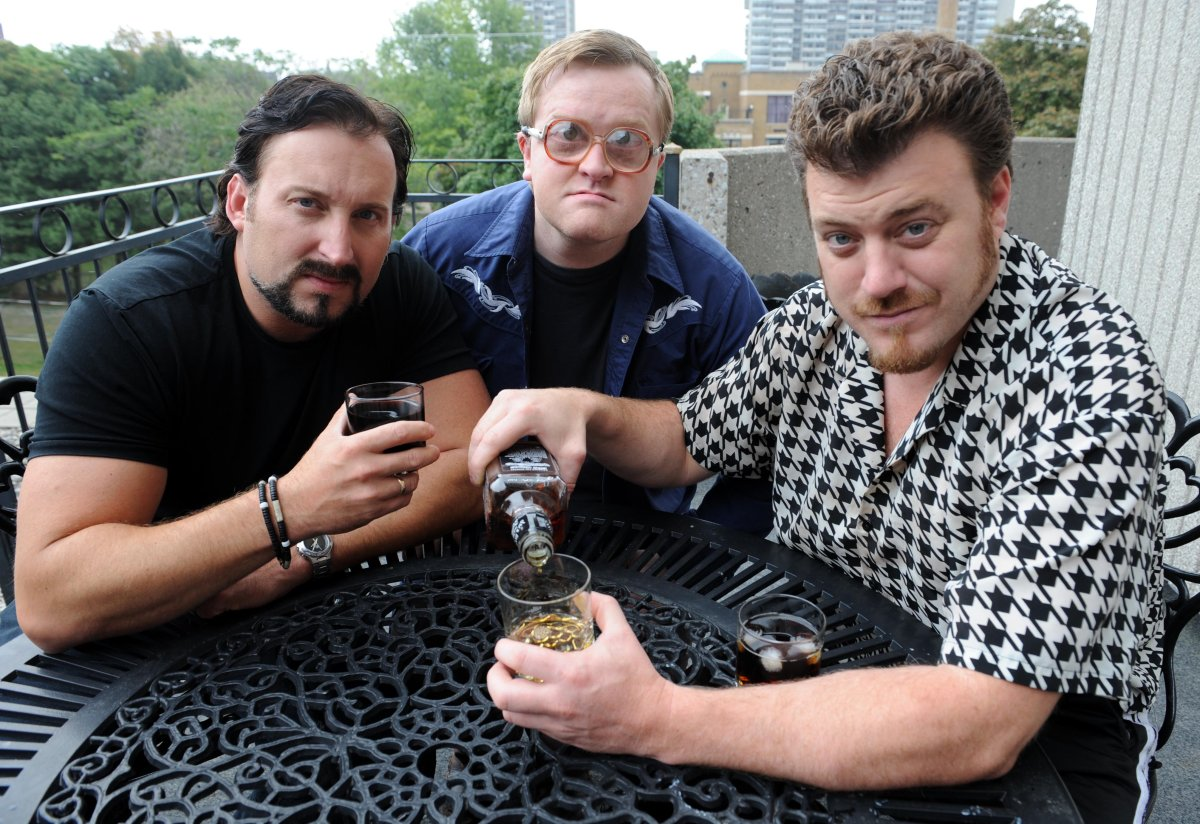

In [ ]:
from IPython.display import Image
image = Image('tpb.jpg')


Wyszukaj na huggingface model pozwalający odpowiedzieć na pytania na podstawie obrazu (zadanie nazywa się `visual-question-answering`) kożystając z modelu odpowiedz na następujące pytania:

* Ile ludzi jest na obrazie?
* Co robią?
* Gdzie się znajdują?
* Ile osób nosi okulary?

Uwaga - model prawdpodobnie trenowany jest na języku angielskim więc pytania musisz zadać po angielsku

In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image

# prepare image + question
url = "https://globalnews.ca/wp-content/uploads/2016/11/gettyimages-165240569.jpg?quality=85&strip=all&w=1200"
image = Image.open(requests.get(url, stream=True).raw)


Predicted answer: 3
Predicted answer: drinking
Predicted answer: outside
Predicted answer: 1


# Zadanie 3 model klasyfikacji tekstu

Na podstawie tekstu

In [ ]:
from transformers import pipeline



text = "A, wie pan, moim zdaniem to nie ma tak, że dobrze, albo że niedobrze. Gdybym miał powiedzieć, co cenię w życiu najbardziej, powiedziałbym, że ludzi. Ludzi, którzy podali mi pomocną dłoń, kiedy sobie nie radziłem, kiedy byłem sam, i co ciekawe, to właśnie przypadkowe spotkania wpływają na nasze życie. Chodzi o to, że kiedy wyznaje się pewne wartości, nawet pozornie uniwersalne, bywa, że nie znajduje się zrozumienia, które by tak rzec, które pomaga się nam rozwijać. Ja miałem szczęście, by tak rzec, ponieważ je znalazłem, i dziękuję życiu! Dziękuję mu; życie to śpiew, życie to taniec, życie to miłość! Wielu ludzi pyta mnie o to samo: ale jak ty to robisz, skąd czerpiesz tę radość? A ja odpowiadam, że to proste! To umiłowanie życia. To właśnie ono sprawia, że dzisiaj na przykład buduję maszyny, a jutro – kto wie? Dlaczego by nie – oddam się pracy społecznej i będę, ot, choćby, sadzić... doć— m-marchew..."
print(sentiment_classifier(text))

[{'label': 'Neutral', 'score': 0.973555862903595}]


Określ jego sentyment (czy jest pozytywny czy negatywny)
Wyszkukaj w huggingface model to klasyfikacji tekstu dla języka polskiego określający sentyment (`sentiment`)
